In [4]:
import pandas as pd

filename = "./data/user_archive.csv"
col_name = "post_raw"

result = pd.read_csv(filename, usecols=[col_name])[col_name].tolist()
print(result)

['查newapi数据库的redemptions表中的used_user_id字段，若此字段为0则为没有使用。\n![image|690x155](upload://ouoBEtR71ekpNFFIQKgL2x1Q6iV.png)', '看完这个贴子第二天寄了，该怎么找他？', '打电话请电信重新下发一下配置看看吧  \n改配置前最好拍照备份所有配置项目', '平时沉浸式翻译用的Qwen-turbo，觉得效果还不错，且价格非常便宜（以我的用量可以忽略不计）\n编码的话有用通义灵码的代码补全，也有用Github Copilot的4o', 'https://sms-activate.guru/\n我自己是用86号码注册的，用平台接码的时候注意你的代理要与号码地区一致', '部分红帽系Linux安装docker时（OpenAnolis），会自动重定向安装podman。二者配置容器镜像加速的方式有区别。\n\n这里以容器镜像地址https://example.mirror.aliyuncs.com，为例\n\n使用编辑器编辑`/etc/containers/registries.conf`\n```\nsudo nano /etc/containers/registries.conf\n```\n\n在文件末尾添加如下内容\n```\n[[registry]]\nlocation = "docker.io"\n[[registry.mirror]]\nlocation = "example.mirror.aliyuncs.com"\n```\n\n然后重启podman服务\n```\nsystemctl restart podman\n```\n\n保险起见，检查podman运行状态\n```\nsystemctl status  podman\n```', '#快问快答添加', '是的，而且在使用podman下载镜像时，会询问你是否从红帽的源下载镜像\n话说不是红帽订阅用户的话压根就用不了红帽的镜像啊...  \n![image|597x143](upload://wPLogRhyogUmKvutbHF2f3iy4NF.png)', '太棒了，我是人机', 'CentOS内默认把podman alias成docker了，指令也是兼容的。还好\nbuildah我会去装一下\

In [5]:
# 清洗数据,这个正则是GPT写的，写的不好见谅喵 :XD
import re
pattern = re.compile(
    r'（帖子已被作者删除）|'      # 文本被删除
    r'（话题已被作者删除）|'      # 话题被删除
    r'#.+?添加|'                  # #****添加 形式
    r'从 #.+? 到 #.+?:.+?|'       # 从 #**** 到 #****:**** 形式
    r'!\[[^\]]*\]\([^)]+\)'      # Markdown 图片 !... [<sup>1</sup>](...)
)

cleaned = [s for s in result if isinstance(s, str) and not pattern.search(s)]
print(cleaned)

['看完这个贴子第二天寄了，该怎么找他？', '打电话请电信重新下发一下配置看看吧  \n改配置前最好拍照备份所有配置项目', '平时沉浸式翻译用的Qwen-turbo，觉得效果还不错，且价格非常便宜（以我的用量可以忽略不计）\n编码的话有用通义灵码的代码补全，也有用Github Copilot的4o', 'https://sms-activate.guru/\n我自己是用86号码注册的，用平台接码的时候注意你的代理要与号码地区一致', '部分红帽系Linux安装docker时（OpenAnolis），会自动重定向安装podman。二者配置容器镜像加速的方式有区别。\n\n这里以容器镜像地址https://example.mirror.aliyuncs.com，为例\n\n使用编辑器编辑`/etc/containers/registries.conf`\n```\nsudo nano /etc/containers/registries.conf\n```\n\n在文件末尾添加如下内容\n```\n[[registry]]\nlocation = "docker.io"\n[[registry.mirror]]\nlocation = "example.mirror.aliyuncs.com"\n```\n\n然后重启podman服务\n```\nsystemctl restart podman\n```\n\n保险起见，检查podman运行状态\n```\nsystemctl status  podman\n```', '太棒了，我是人机', 'CentOS内默认把podman alias成docker了，指令也是兼容的。还好\nbuildah我会去装一下\n主要是podman的镜像配置与docker不一样，另外docker info docker version输出的详细信息不一样，这样部分第三方程序或者脚本总是检测不到安装了docker和docker-compose，这些就需要自己手动去调整了', '实在不知道的话，就在公司网页上集成一个聊天助手，介绍公司业务之类的（就跟以前的客服机器人一样）糊弄下领导的要求\n可以参考这个贴子https://linux.do/t/topic/322918/21', '右边两个“热门”Tab描述分别是“过去一年，一月，一周或一

In [6]:
# 总结高频词汇
from collections import Counter

# 统计词频
counter = Counter(cleaned)

# 获取按频率排序的列表（词, 频数）
freq_list = counter.most_common()
hotword = counter.most_common(10)

print(hotword)

[('我试试看', 2), ('原来如此', 2), ('谢谢分享', 2), ('确实，确实', 2), ('没事没事', 2), ('没看懂 :melting_face:', 2), ('谢谢大佬 :face_savoring_food:', 2), ('不清楚欸', 2), ('说得好，撸撸猫猫 :face_savoring_food:', 2), ('(又不是不能用.jpg', 2)]


In [7]:
# 查询回复时间
import pandas as pd

filename = "./data/user_archive.csv"
col_name = "created_at"

post_create = pd.read_csv(filename, usecols=[col_name])[col_name].tolist()
print(post_create)

['2025-01-02T05:35:01.881Z', '2025-01-02T06:42:57.000Z', '2025-01-02T12:54:27.477Z', '2025-01-02T13:10:46.677Z', '2025-01-03T06:01:49.686Z', '2025-01-03T09:52:19.157Z', '2025-01-03T09:55:02.799Z', '2025-01-03T10:00:40.078Z', '2025-01-03T10:09:53.714Z', '2025-01-03T10:22:30.300Z', '2025-01-03T10:36:34.000Z', '2025-01-03T11:26:55.063Z', '2025-01-03T11:29:15.507Z', '2025-01-03T11:58:20.913Z', '2025-01-03T12:02:33.892Z', '2025-01-03T12:12:08.981Z', '2025-01-03T12:32:43.203Z', '2025-01-03T13:00:09.492Z', '2025-01-03T13:01:11.561Z', '2025-01-03T13:10:40.985Z', '2025-01-03T13:57:22.115Z', '2025-01-04T01:07:17.298Z', '2025-01-04T01:09:44.536Z', '2025-01-04T02:34:47.714Z', '2025-01-04T02:51:38.177Z', '2025-01-04T02:58:20.718Z', '2025-01-04T03:06:13.564Z', '2025-01-04T03:55:28.813Z', '2025-01-04T04:19:05.592Z', '2025-01-04T04:20:54.898Z', '2025-01-04T04:25:15.778Z', '2025-01-04T04:45:45.314Z', '2025-01-04T05:33:14.308Z', '2025-01-04T05:35:20.544Z', '2025-01-04T05:37:11.569Z', '2025-01-04T05:43:4

In [8]:
# 查询点赞时间
import pandas as pd

filename = "./data/likes.csv"
col_name = "updated_at"

like_create = pd.read_csv(filename, usecols=[col_name])[col_name].tolist()
print(like_create)

['2025-01-01 04:23:01 UTC', '2025-01-01 14:46:13 UTC', '2025-01-02 12:25:39 UTC', '2025-01-03 09:13:28 UTC', '2025-01-03 09:58:14 UTC', '2025-01-03 10:02:55 UTC', '2025-01-03 11:55:20 UTC', '2025-01-03 13:34:05 UTC', '2025-01-03 14:20:11 UTC', '2025-01-04 04:01:12 UTC', '2025-01-04 04:06:51 UTC', '2025-01-04 04:22:23 UTC', '2025-01-04 05:02:29 UTC', '2025-01-04 05:02:50 UTC', '2025-01-04 06:33:46 UTC', '2025-01-04 10:44:38 UTC', '2025-01-04 12:58:35 UTC', '2025-01-04 13:06:22 UTC', '2025-01-05 01:09:22 UTC', '2025-01-05 01:42:39 UTC', '2025-01-05 03:55:32 UTC', '2025-01-05 13:26:23 UTC', '2025-01-05 14:36:42 UTC', '2025-07-18 13:09:58 UTC', '2025-01-06 01:02:00 UTC', '2025-01-06 04:21:28 UTC', '2025-01-06 04:44:21 UTC', '2025-01-06 05:17:20 UTC', '2025-01-06 06:17:51 UTC', '2025-01-06 07:56:03 UTC', '2025-01-06 11:31:46 UTC', '2025-01-06 13:40:56 UTC', '2025-01-06 13:58:49 UTC', '2025-01-07 04:15:30 UTC', '2025-01-07 04:21:24 UTC', '2025-01-07 06:11:10 UTC', '2025-01-07 07:20:57 UTC', 

In [9]:
# 清洗数据，合并回复和点赞时间
import pandas as pd

# post_create 和 like_create 为原始时间字符串数组
all_times = post_create + like_create

# 先转成 Series 再解析为 UTC 时间
s = pd.to_datetime(pd.Series(all_times), utc=True, errors='coerce')

# 去掉无法解析的，转换为北京时间并按时间排序
s = s.dropna().dt.tz_convert('Asia/Shanghai').sort_values()

# 统一输出格式，存入 active_time 数组
active_time = s.dt.strftime('%Y-%m-%d %H:%M:%S').tolist()


print(active_time)

['2025-01-02 13:35:01', '2025-01-02 14:42:57', '2025-01-02 20:54:27', '2025-01-02 21:10:46', '2025-01-03 14:01:49', '2025-01-03 17:52:19', '2025-01-03 17:55:02', '2025-01-03 18:00:40', '2025-01-03 18:09:53', '2025-01-03 18:22:30', '2025-01-03 18:36:34', '2025-01-03 19:26:55', '2025-01-03 19:29:15', '2025-01-03 19:58:20', '2025-01-03 20:02:33', '2025-01-03 20:12:08', '2025-01-03 20:32:43', '2025-01-03 21:00:09', '2025-01-03 21:01:11', '2025-01-03 21:10:40', '2025-01-03 21:57:22', '2025-01-04 09:07:17', '2025-01-04 09:09:44', '2025-01-04 10:34:47', '2025-01-04 10:51:38', '2025-01-04 10:58:20', '2025-01-04 11:06:13', '2025-01-04 11:55:28', '2025-01-04 12:19:05', '2025-01-04 12:20:54', '2025-01-04 12:25:15', '2025-01-04 12:45:45', '2025-01-04 13:33:14', '2025-01-04 13:35:20', '2025-01-04 13:37:11', '2025-01-04 13:43:43', '2025-01-04 13:49:10', '2025-01-04 14:04:59', '2025-01-04 14:26:18', '2025-01-04 14:26:34', '2025-01-04 14:31:13', '2025-01-04 14:33:21', '2025-01-04 20:58:25', '2025-01-0

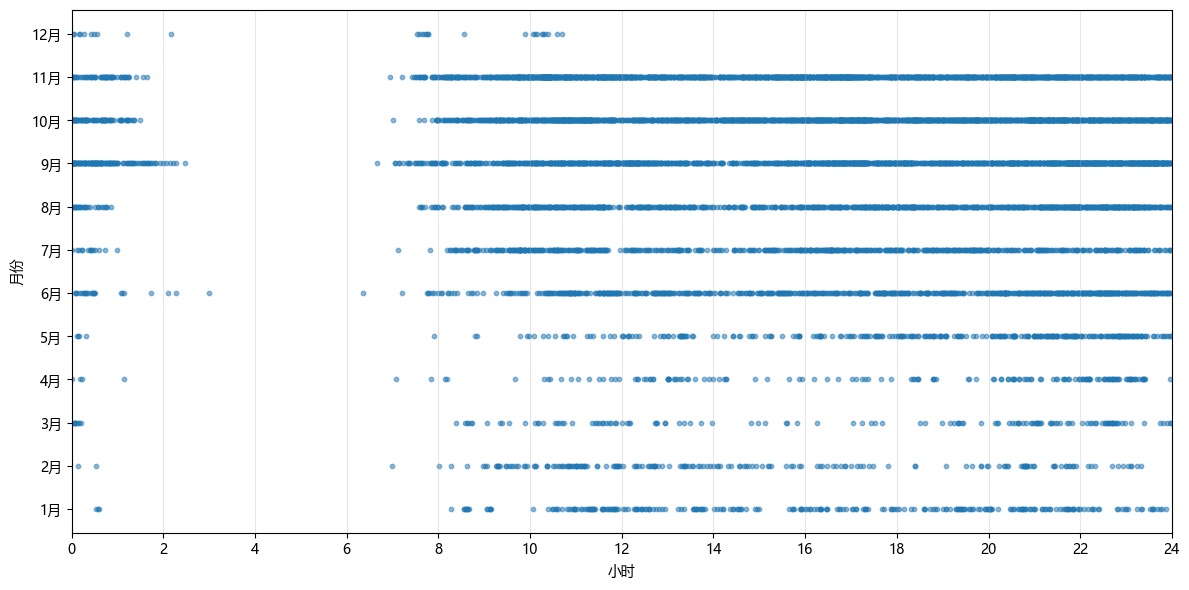

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

s = pd.to_datetime(active_time)

df = pd.DataFrame({'dt': s})
df['hour'] = df['dt'].dt.hour + df['dt'].dt.minute / 60.0
df['month'] = df['dt'].dt.month

plt.figure(figsize=(12, 6))
plt.scatter(df['hour'], df['month'], s=10, alpha=0.5)

plt.xlim(0, 24)
plt.xticks(range(0, 25, 2))
plt.yticks(range(1, 13), [f'{m}月' for m in range(1, 13)])

plt.xlabel('小时')
plt.ylabel('月份')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


In [11]:
# 提取分区数据
import pandas as pd

filename = "./data/user_archive.csv"
col_name = "categories"

categories = pd.read_csv(filename, usecols=[col_name])[col_name].tolist()
print(categories)

['开发调优', '搞七捻三', '开发调优', '开发调优', '搞七捻三|搞七捻三, Lv1', '开发调优', '开发调优', '开发调优', '资源荟萃', '开发调优', '开发调优', '运营反馈', '运营反馈', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '开发调优', '搞七捻三', '跳蚤市场', '开发调优', '开发调优', '开发调优', '搞七捻三|搞七捻三, Lv1', '跳蚤市场', '搞七捻三', '前沿快讯', '开发调优', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三|搞七捻三, Lv1', '搞七捻三', '搞七捻三|搞七捻三, Lv1', '搞七捻三|搞七捻三, Lv1', '搞七捻三|搞七捻三, Lv1', '搞七捻三|搞七捻三, Lv1', '搞七捻三|搞七捻三, Lv1', '搞七捻三|搞七捻三, Lv1', '资源荟萃|资源荟萃, Lv1', '资源荟萃|资源荟萃, Lv1', '资源荟萃|资源荟萃, Lv1', '搞七捻三|搞七捻三, Lv1', '搞七捻三', '搞七捻三', '开发调优', '搞七捻三', '开发调优', '开发调优', '开发调优', '开发调优', '开发调优', '搞七捻三', '开发调优', '开发调优', '搞七捻三', '搞七捻三', '搞七捻三', '开发调优', '搞七捻三', '开发调优', '搞七捻三', '搞七捻三', '搞七捻三', '前沿快讯', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三|搞七捻三, Lv1', '搞七捻三', '搞七捻三', '搞七捻三', '福利羊毛', '搞七捻三', '开发调优', '搞七捻三', '搞七捻三', '开发调优', '搞七捻三', '开发调优', '开发调优', '开发调优', '开发调优', '开发调优', '开发调优', '前沿快讯', '开发调优|开发调优, Lv1', '搞七捻三', '搞七捻三', '开发调优', '搞七捻三', '开发调优', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三|搞七捻三, Lv1', '开发调优', '搞七捻三', '搞七捻三', '开发调优|开发调优, Lv1', '搞七捻三', '搞七捻三

In [14]:
clean_categories = [
    (c.split('|', 1)[0].strip() if isinstance(c, str) else c)
    for c in categories
]

# 输出或写回文件
print(clean_categories)


['开发调优', '搞七捻三', '开发调优', '开发调优', '搞七捻三', '开发调优', '开发调优', '开发调优', '资源荟萃', '开发调优', '开发调优', '运营反馈', '运营反馈', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '开发调优', '搞七捻三', '跳蚤市场', '开发调优', '开发调优', '开发调优', '搞七捻三', '跳蚤市场', '搞七捻三', '前沿快讯', '开发调优', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '资源荟萃', '资源荟萃', '资源荟萃', '搞七捻三', '搞七捻三', '搞七捻三', '开发调优', '搞七捻三', '开发调优', '开发调优', '开发调优', '开发调优', '开发调优', '搞七捻三', '开发调优', '开发调优', '搞七捻三', '搞七捻三', '搞七捻三', '开发调优', '搞七捻三', '开发调优', '搞七捻三', '搞七捻三', '搞七捻三', '前沿快讯', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '福利羊毛', '搞七捻三', '开发调优', '搞七捻三', '搞七捻三', '开发调优', '搞七捻三', '开发调优', '开发调优', '开发调优', '开发调优', '开发调优', '开发调优', '前沿快讯', '开发调优', '搞七捻三', '搞七捻三', '开发调优', '搞七捻三', '开发调优', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '开发调优', '搞七捻三', '搞七捻三', '开发调优', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '福利羊毛', '开发调优', '开发调优', '福利羊毛', '搞七捻三', '搞七捻三', '搞七捻三', '搞七捻三', '运营反馈', '搞七捻三', '开发调优', '开发调优', '开发调优', '开发调优',

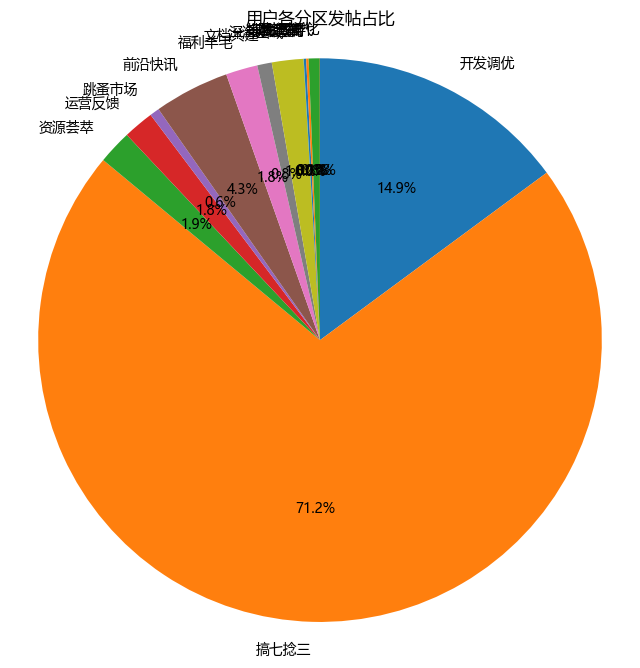

In [17]:
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import font_manager, rcParams

# 优先选择在 Linux / Windows 都比较常见的中文字体
font_candidates = [
    'Noto Sans CJK SC',  # 推荐安装，跨平台通用
    'WenQuanYi Zen Hei', # 常见于部分 Linux 发行版
    'Microsoft YaHei',   # Windows
    'SimHei',            # Windows 常见黑体
    'DejaVu Sans',       # matplotlib 自带，中文有限但兜底
]

available_fonts = {f.name for f in font_manager.fontManager.ttflist}
for fname in font_candidates:
    if fname in available_fonts:
        rcParams['font.sans-serif'] = [fname]
        break

rcParams['axes.unicode_minus'] = False

# 假设 clean_categories 已存在
data = [c for c in clean_categories if isinstance(c, str) and c.strip() and c.strip() != '-']

counter = Counter(data)

labels = list(counter.keys())
sizes = list(counter.values())

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
plt.title('用户各分区发帖占比')
plt.axis('equal')
plt.show()


In [ ]:
# 还有个每日访问量统计，等会做吧